In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importing libraries
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Task2/train_data.csv")
#df.drop_index(inplace=True)
df.head()
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208764 entries, 0 to 208763
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     208764 non-null  int64 
 1   seller                 208764 non-null  object
 2   offer_type             208764 non-null  object
 3   price                  208764 non-null  int64 
 4   abtest                 208764 non-null  object
 5   vehicle_type           208764 non-null  object
 6   year_of_registration   208764 non-null  int64 
 7   gearbox                208764 non-null  object
 8   power                  208764 non-null  int64 
 9   model                  208764 non-null  object
 10  kilometer              208764 non-null  int64 
 11  month_of_registration  208764 non-null  int64 
 12  fuel_type              208764 non-null  object
 13  brand                  208764 non-null  object
 14  not_repaired_damage    208764 non-null  object
 15  

(208764, 16)

In [6]:
pl_y=df['price'].value_counts()
df.head()

,id,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code
0,0,privat,Angebot,8990,control,bus,2007,automatik,136,b_klasse,125000,1,benzin,mercedes_benz,nein,55232
1,1,privat,Angebot,49900,test,suv,2011,automatik,400,cayenne,80000,6,benzin,porsche,nein,89155
2,2,privat,Angebot,7500,control,limousine,2005,manuell,0,a6,150000,11,diesel,audi,nein,26125
3,3,privat,Angebot,1350,control,limousine,1997,manuell,170,3er,150000,5,benzin,bmw,nein,37671
4,4,privat,Angebot,650,test,kombi,1998,automatik,170,e_klasse,150000,8,benzin,mercedes_benz,ja,45141


In [7]:
df.describe()

,id,price,year_of_registration,power,kilometer,month_of_registration,postal_code
count,208764.000000,2.087640e+05,208764.000000,208764.000000,208764.000000,208764.000000,208764.000000
mean,104381.500000,8.563905e+03,2003.297863,126.385857,124031.011094,6.181717,51851.998620
std,60265.120136,3.837843e+05,6.528143,144.950397,39859.350281,3.472495,25850.643904
min,0.000000,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,52190.750000,1.500000e+03,1999.000000,78.000000,100000.000000,3.000000,31241.000000
50%,104381.500000,3.850000e+03,2004.000000,116.000000,150000.000000,6.000000,51105.000000
75%,156572.250000,8.600000e+03,2008.000000,150.000000,150000.000000,9.000000,72770.000000
max,208763.000000,1.000000e+08,2018.000000,17700.000000,150000.000000,12.000000,99998.000000


In [8]:
zero_price=df[df["price"]<=100]
zero_price.shape[0]

3466

In [9]:
#df["power"].replace([0],np.mean(df["power"]),inplace=True)
#df["price"].replace([0],np.mean(df["price"]),inplace=True)
df["Years"] = 2022-df["year_of_registration"]
df.vehicle_type.unique()

array(['bus', 'suv', 'limousine', 'kombi', 'cabrio', 'kleinwagen',
       'coupe', 'andere'], dtype=object)

In [10]:
list_vehicle = ['bus', 'suv', 'limousine', 'kombi', 'cabrio', 'kleinwagen','coupe', 'andere']

for items in list_vehicle:
  dff=df.loc[(df["vehicle_type"]== items) & (df["power"]>100 )]
  df['power'] = np.where((df['power'] <= 1) & (df['vehicle_type'] == items), np.mean(dff['power']), df['power'])

for items in list_vehicle:
  dff=df.loc[(df["vehicle_type"]== items) & (df["power"]>100 )]
  df['power'] = np.where((df['power'] <= 100) & (df['vehicle_type'] == items), np.mean(dff['power']), df['power'])

zero_power=df[df["power"]<=100]
zero_power.shape[0]

0

In [11]:
list_vehicle = ['bus', 'suv', 'limousine', 'kombi', 'cabrio', 'kleinwagen','coupe', 'andere']

for items in list_vehicle:
  dff=df.loc[(df["vehicle_type"]== items) & (df["price"]>100 )]
  df['price'] = np.where((df['price'] <=1) & (df['vehicle_type'] == items), np.mean(dff['price']), df['price'])

for items in list_vehicle:
  dff=df.loc[(df["vehicle_type"]== items) & (df["price"]>100 )]
  df['price'] = np.where((df['price'] <=100) & (df['vehicle_type'] == items), np.mean(dff['price']), df['price'])



zero_price=df[df["price"]<100]
zero_price.shape[0]

0

In [12]:
df.describe()

,id,price,year_of_registration,power,kilometer,month_of_registration,postal_code,Years
count,208764.000000,2.087640e+05,208764.000000,208764.000000,208764.000000,208764.000000,208764.000000,208764.000000
mean,104381.500000,8.701376e+03,2003.297863,156.107072,124031.011094,6.181717,51851.998620,18.702137
std,60265.120136,3.837832e+05,6.528143,137.019229,39859.350281,3.472495,25850.643904,6.528143
min,0.000000,1.010000e+02,1910.000000,101.000000,5000.000000,0.000000,1067.000000,4.000000
25%,52190.750000,1.650000e+03,1999.000000,131.000000,100000.000000,3.000000,31241.000000,14.000000
50%,104381.500000,3.990000e+03,2004.000000,144.083064,150000.000000,6.000000,51105.000000,18.000000
75%,156572.250000,8.850000e+03,2008.000000,163.000000,150000.000000,9.000000,72770.000000,23.000000
max,208763.000000,1.000000e+08,2018.000000,17700.000000,150000.000000,12.000000,99998.000000,112.000000


x=df.drop(['id'], axis =1)
# x.head()
sns.pairplot(x)

In [13]:
#pass
#sns.pairplot(df)


In [14]:
np.mean(dff["price"])

4667.22997032641

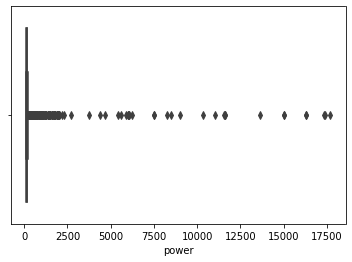

In [15]:
sns.boxplot(x=df["power"])
plt.show()

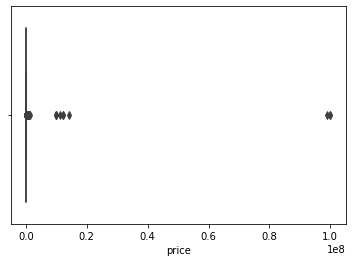

In [16]:
#sns.distplot(x=df["price"],bins=15,kde=False)
#plt.show()
sns.boxplot(x=df["price"])
plt.show()

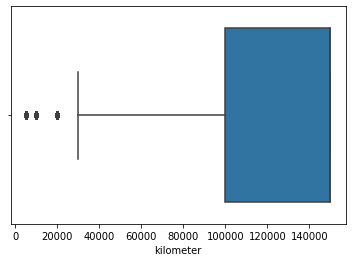

In [17]:
sns.boxplot(x=df["kilometer"])
plt.show()

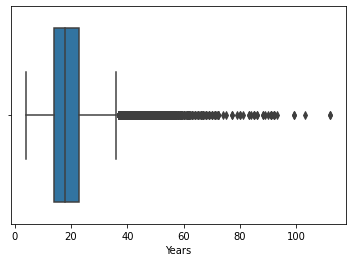

In [18]:
sns.boxplot(x=df["Years"])
plt.show()

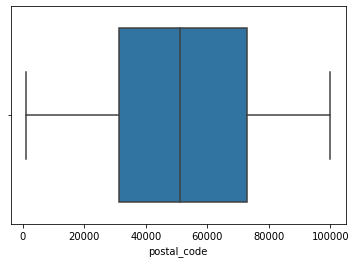

In [19]:
sns.boxplot(x=df["postal_code"])
plt.show()

In [20]:
x=df.drop(["id","price","seller","offer_type","year_of_registration"],axis=1)
y=df.pop("price")
x.shape, y.shape

((208764, 12), (208764,))

In [21]:
for label,content in x.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

for label,content in x.items():
  if not pd.api.types.is_numeric_dtype(content):
    x[label]=pd.Categorical(content).codes


In [22]:
n_list=['power', 'kilometer', 'month_of_registration', 'Years']
scaler=StandardScaler()
x[n_list]=scaler.fit_transform(x[n_list])
x

,abtest,vehicle_type,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code,Years
0,0,1,0,-0.146747,48,0.024310,-1.492221,1,20,1,55232,-0.567106
1,1,7,0,1.779995,68,-1.104662,-0.052331,1,26,1,89155,-1.179839
2,0,6,1,0.009829,31,0.651517,1.387560,3,1,1,26125,-0.260739
3,0,6,1,0.101394,11,0.651517,-0.340309,1,2,1,37671,0.964727
4,1,5,0,0.101394,97,0.651517,0.523626,1,20,0,45141,0.811544
...,...,...,...,...,...,...,...,...,...,...,...,...
208759,0,1,1,-0.161343,40,0.651517,1.099582,3,25,0,88456,-0.567106
208760,1,5,1,0.101394,60,0.651517,1.387560,1,20,1,61137,0.045628
208761,0,2,1,-0.343800,8,0.024310,1.387560,3,25,1,12057,-0.260739
208762,0,6,1,0.009829,40,0.024310,-1.492221,1,25,1,75175,0.658361


In [23]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.3,random_state=13534)
fitt=SGDRegressor()
fitt.fit(x_train,y_train)

SGDRegressor()

In [24]:
y_pred=fitt.predict(x_valid)
r2_score(y_valid,y_pred)

-4.013787635916463e+23

In [25]:
model = RandomForestRegressor(n_jobs=-1,random_state=42) 
%time
# Python magical function to check how long it took 
model.fit(x_train,y_train)
model.score(x_valid,y_valid)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


-0.0009563912658163698

In [26]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid={ "n_estimators": np.arange(10,1000,10),
         "max_depth":[None,3,5,10],
         "min_samples_leaf":np.arange(1,20,2),
         "min_samples_split":np.arange(2,20,2),
         "max_features":[0.5,1,"auto","sqrt"],
         "max_samples":[100000]
         }
rf_model=RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1,random_state=42),
                           param_distributions = rf_grid,
                           cv=5,
                           verbose=True,
                            n_iter=2
                           )
rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 53.4 s, sys: 1.42 s, total: 54.8 s
Wall time: 4min 22s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'max_samples': [100000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 62

In [27]:
rf_model.best_params_

{'n_estimators': 230,
 'min_samples_split': 6,
 'min_samples_leaf': 13,
 'max_samples': 100000,
 'max_features': 'sqrt',
 'max_depth': None}

In [28]:

%%time
ideal_model=RandomForestRegressor(max_depth= None,max_features=1,max_samples= 100000,min_samples_leaf= 7,min_samples_split= 10,n_estimators=930,random_state=42
)
# Fitting the ideal model to data set
#X_train=X_train.drop("Unnamed: 0",axis=1)
ideal_model.fit(x_train,y_train)
ideal_model.score(x_valid,y_valid)

CPU times: user 1min 4s, sys: 379 ms, total: 1min 5s
Wall time: 1min 4s


0.0002281932462722125

In [29]:
ideal_model.score(x_valid,y_valid)

0.0002281932462722125

In [30]:
y_pred_rf=ideal_model.predict(x_valid)
r2_score(y_valid,y_pred_rf)

0.0002281932462722125


#**Final Predictions on Test Data**   

In [31]:
dft=pd.read_csv("/content/drive/MyDrive/Task2/test_data.csv")
#df.drop_index(inplace=True)
dft.head()

,id,seller,offer_type,abtest,vehicle_type,year_of_registration,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code
0,0,privat,Angebot,control,kleinwagen,2000,manuell,75,fiesta,150000,3,benzin,ford,nein,54294
1,1,privat,Angebot,test,kombi,1995,automatik,0,e_klasse,150000,3,benzin,mercedes_benz,ja,21220
2,2,privat,Angebot,control,kleinwagen,1998,manuell,54,corsa,125000,8,benzin,opel,nein,40233
3,3,privat,Angebot,control,bus,2009,manuell,163,sprinter,125000,4,diesel,mercedes_benz,nein,93179
4,4,privat,Angebot,test,kombi,2007,manuell,87,logan,150000,5,benzin,dacia,nein,56862


In [32]:
dft.describe()

,id,year_of_registration,power,kilometer,month_of_registration,postal_code
count,52192.000000,52192.000000,52192.000000,52192.000000,52192.000000,52192.000000
mean,26095.500000,2003.356051,126.118409,124169.317137,6.185891,51685.563956
std,15066.676962,6.447686,146.580085,39803.641537,3.466845,25814.363536
min,0.000000,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,13047.750000,1999.000000,80.000000,100000.000000,3.000000,31135.000000
50%,26095.500000,2004.000000,116.000000,150000.000000,6.000000,50968.000000
75%,39143.250000,2008.000000,150.000000,150000.000000,9.000000,72644.000000
max,52191.000000,2018.000000,20000.000000,150000.000000,12.000000,99998.000000


In [33]:
list_vehicle = ['bus', 'suv', 'limousine', 'kombi', 'cabrio', 'kleinwagen','coupe', 'andere']

for items in list_vehicle:
  dff=dft.loc[(dft["vehicle_type"]== items) & (dft["power"]>100 )]
  dft['power'] = np.where((dft['power'] <= 100) & (dft['vehicle_type'] == items), np.mean(dff['power']), dft['power'])

zero_power=dft[dft["power"]<=100]
zero_power.shape[0]

0

In [34]:
dft["Years"]=2022-dft["year_of_registration"]
x_test=dft.drop(["id","seller","offer_type","year_of_registration"],axis=1)
x_test.shape

(52192, 12)

In [35]:
for label,content in x_test.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

for label,content in x_test.items():
  if not pd.api.types.is_numeric_dtype(content):
    x_test[label]=pd.Categorical(content).codes

In [36]:
n_list=['power', 'kilometer', 'month_of_registration', 'Years']
scaler=StandardScaler()
x_test[n_list]=scaler.fit_transform(x_test[n_list])
x_test

,abtest,vehicle_type,gearbox,power,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,postal_code,Years
0,0,4,1,-0.086775,102,0.648959,-0.918968,1,10,1,54294,0.520510
1,1,5,0,-0.015945,95,0.648959,-0.918968,1,20,0,21220,1.295989
2,0,4,1,-0.086775,83,0.020870,0.523279,1,24,1,40233,0.830701
3,0,1,1,0.053424,209,0.020870,-0.630519,3,20,1,93179,-0.875353
4,1,5,1,-0.015945,141,0.648959,-0.342069,1,6,1,56862,-0.565162
...,...,...,...,...,...,...,...,...,...,...,...,...
52187,1,6,1,-0.393344,103,-1.612162,1.677077,1,10,1,30625,-0.875353
52188,1,6,1,0.005683,95,0.648959,0.811728,3,20,1,26723,1.916373
52189,1,2,0,0.118199,106,0.648959,-0.342069,1,32,1,56729,0.520510
52190,1,6,0,0.536222,116,-2.365869,0.523279,1,37,1,31303,-1.650833


In [37]:
y_test=ideal_model.predict(x_test)
y_test

array([ 1451.3107936 ,  2226.75820497,  1698.20049992, ...,
        3547.79285087, 23902.09944731,  6463.12748331])

In [38]:
df_test=pd.DataFrame(y_test,columns=["price"])
df_test["id"]=dft["id"]
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df
df_final=df_column_switch(df_test,"price","id")
df_final

,id,price
0,0,1451.310794
1,1,2226.758205
2,2,1698.200500
3,3,17289.909683
4,4,3667.576016
...,...,...
52187,52187,7329.090975
52188,52188,3164.154581
52189,52189,3547.792851
52190,52190,23902.099447


In [39]:
df_final.to_csv("/content/drive/MyDrive/Task2/test-pred.csv",index=False)